# Data Analysis and Modelling Seattle Cycle Sharing

In this data analysis we're looking into data about the Seattle cycle share project. It consists of several related datasets, one about stations, one about trips and one about weather.

In this data analysis i'll focus on the relation between weather and number of trips. I have the hypothesis that bad weather means fewer trips and good weather means more. Let's see!

In [193]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.max_open_warning': 0})

figsize=(10,5)

First we load the weather data:

In [42]:
df_weather = pd.read_csv('weather.csv', index_col='Date', parse_dates=['Date'])
df_weather.head()

,Max_Temperature_F,Mean_Temperature_F,Min_TemperatureF,Max_Dew_Point_F,MeanDew_Point_F,Min_Dewpoint_F,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Sea_Level_Pressure_In,Mean_Sea_Level_Pressure_In,Min_Sea_Level_Pressure_In,Max_Visibility_Miles,Mean_Visibility_Miles,Min_Visibility_Miles,Max_Wind_Speed_MPH,Mean_Wind_Speed_MPH,Max_Gust_Speed_MPH,Precipitation_In,Events
Date,,,,,,,,,,,,,,,,,,,,
2014-10-13,71,62.0,54,55,51,46,87,68,46,30.03,29.79,29.65,10,10,4,13,4,21,0.00,Rain
2014-10-14,63,59.0,55,52,51,50,88,78,63,29.84,29.75,29.54,10,9,3,10,5,17,0.11,Rain
2014-10-15,62,58.0,54,53,50,46,87,77,67,29.98,29.71,29.51,10,9,3,18,7,25,0.45,Rain
2014-10-16,71,61.0,52,49,46,42,83,61,36,30.03,29.95,29.81,10,10,10,9,4,-,0.00,Rain
2014-10-17,64,60.0,57,55,51,41,87,72,46,29.83,29.78,29.73,10,10,6,8,3,-,0.14,Rain


In [43]:
corr = df_weather.corr()
corr

,Max_Temperature_F,Mean_Temperature_F,Min_TemperatureF,Max_Dew_Point_F,MeanDew_Point_F,Min_Dewpoint_F,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Sea_Level_Pressure_In,Mean_Sea_Level_Pressure_In,Min_Sea_Level_Pressure_In,Max_Visibility_Miles,Mean_Visibility_Miles,Min_Visibility_Miles,Max_Wind_Speed_MPH,Mean_Wind_Speed_MPH,Precipitation_In
Max_Temperature_F,1.000000,0.970604,0.850757,0.728071,0.716776,0.618153,-0.538677,-0.673360,-0.645518,-0.245586,-0.113305,-0.004340,0.076832,0.352930,0.433822,-0.078493,-0.104616,-0.257294
Mean_Temperature_F,0.970604,1.000000,0.950002,0.804748,0.813847,0.736988,-0.521249,-0.584973,-0.521134,-0.304912,-0.174619,-0.063535,0.082847,0.322032,0.377079,-0.026462,-0.018131,-0.194528
Min_TemperatureF,0.850757,0.950002,1.000000,0.835920,0.871332,0.830241,-0.453532,-0.417029,-0.310985,-0.360273,-0.241918,-0.136873,0.078531,0.247176,0.266639,0.038953,0.094826,-0.096238
Max_Dew_Point_F,0.728071,0.804748,0.835920,1.000000,0.963160,0.858492,-0.041315,-0.067954,-0.044160,-0.381999,-0.303180,-0.223668,0.074115,0.084930,0.023170,0.153649,0.174248,0.075300
MeanDew_Point_F,0.716776,0.813847,0.871332,0.963160,1.000000,0.946940,-0.057034,-0.025804,0.013014,-0.370888,-0.279998,-0.194587,0.067597,0.092983,0.048266,0.100456,0.152231,0.043314
Min_Dewpoint_F,0.618153,0.736988,0.830241,0.858492,0.946940,1.000000,-0.040466,0.050118,0.119767,-0.330140,-0.245172,-0.169216,0.068396,0.083640,0.044290,0.074787,0.156039,0.031668
Max_Humidity,-0.538677,-0.521249,-0.453532,-0.041315,-0.057034,-0.040466,1.000000,0.849414,0.641696,0.065362,-0.024841,-0.095776,-0.033205,-0.339285,-0.505111,0.158590,0.134878,0.309318
Mean_Humidity,-0.673360,-0.584973,-0.417029,-0.067954,-0.025804,0.050118,0.849414,1.000000,0.914512,0.011883,-0.091556,-0.164753,-0.055548,-0.464106,-0.622137,0.175688,0.221331,0.419802
Min_Humidity,-0.645518,-0.521134,-0.310985,-0.044160,0.013014,0.119767,0.641696,0.914512,1.000000,-0.042554,-0.136236,-0.201519,-0.069976,-0.474661,-0.591645,0.197703,0.277030,0.430030
Max_Sea_Level_Pressure_In,-0.245586,-0.304912,-0.360273,-0.381999,-0.370888,-0.330140,0.065362,0.011883,-0.042554,1.000000,0.946869,0.843160,-0.024605,0.059293,0.105847,-0.253831,-0.240474,-0.321225


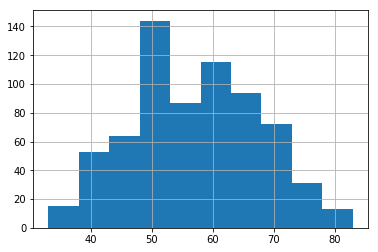

In [44]:
df_weather['Mean_Temperature_F'].hist()

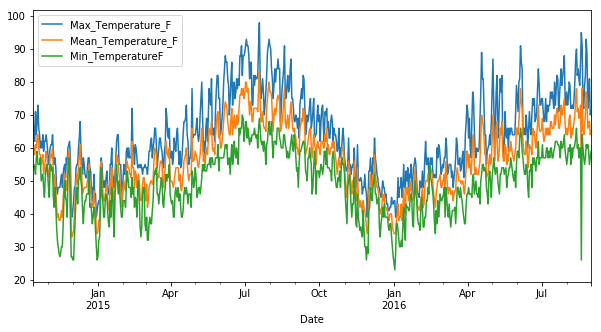

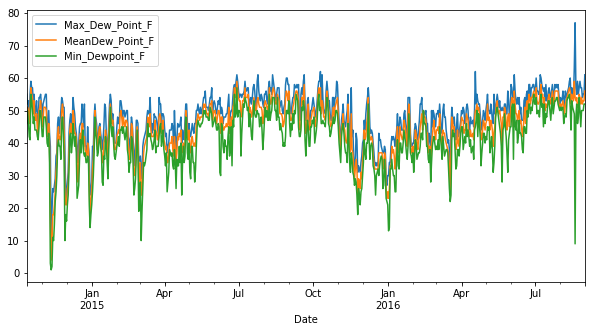

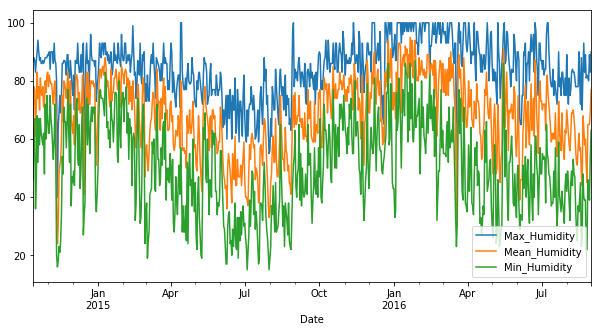

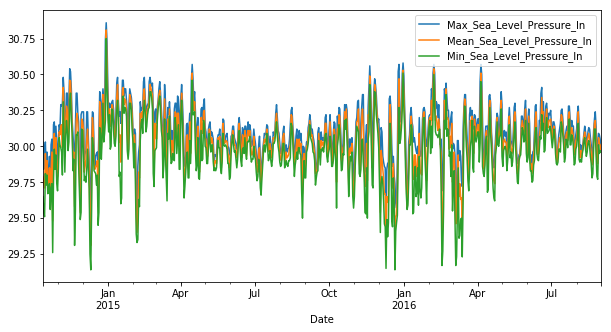

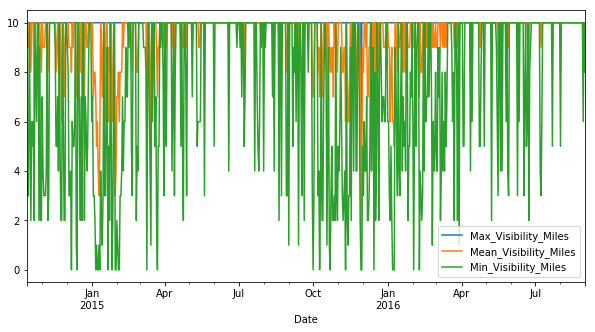

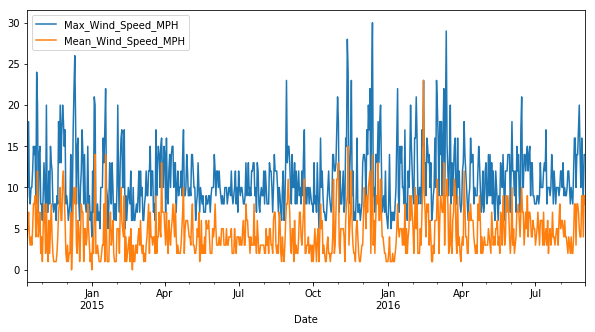

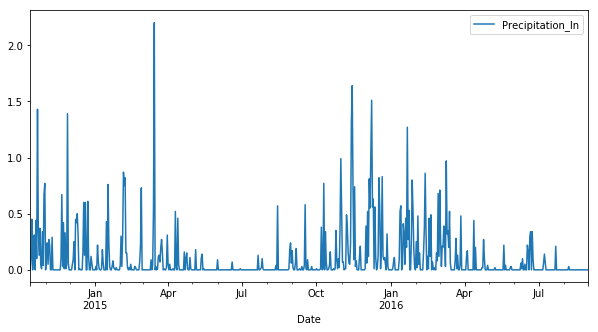

In [121]:
df_weather[['Max_Temperature_F', 'Mean_Temperature_F', 'Min_TemperatureF']].plot(figsize=figsize)
df_weather[['Max_Dew_Point_F', 'MeanDew_Point_F', 'Min_Dewpoint_F']].plot(figsize=figsize)
df_weather[['Max_Humidity', 'Mean_Humidity', 'Min_Humidity']].plot(figsize=figsize)
df_weather[['Max_Sea_Level_Pressure_In', 'Mean_Sea_Level_Pressure_In', 'Min_Sea_Level_Pressure_In']].plot(figsize=figsize)
df_weather[['Max_Visibility_Miles', 'Mean_Visibility_Miles', 'Min_Visibility_Miles']].plot(figsize=figsize)
df_weather[['Max_Wind_Speed_MPH', 'Mean_Wind_Speed_MPH']].plot(figsize=figsize)
df_weather[['Precipitation_In']].plot(figsize=figsize)

Then we load the trip data:

In [169]:
df_trips = pd.read_csv('trip.csv', index_col='trip_id', parse_dates=['starttime', 'stoptime'])
df_trips.head()

,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
trip_id,,,,,,,,,,,
431,2014-10-13 10:31:00,2014-10-13 10:48:00,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960.0
432,2014-10-13 10:32:00,2014-10-13 10:48:00,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970.0
433,2014-10-13 10:33:00,2014-10-13 10:48:00,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988.0
434,2014-10-13 10:34:00,2014-10-13 10:48:00,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977.0
435,2014-10-13 10:34:00,2014-10-13 10:49:00,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971.0


([<matplotlib.patches.Wedge at 0x11809be80>,
  <matplotlib.text.Text at 0x1180ac2b0>])

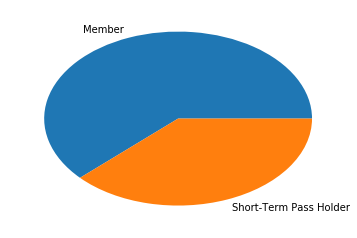

In [112]:
#df_trips.groupby(by='gender').count()
#df_trips.groupby(by='bikeid').count()
df_trips.groupby(by='usertype').size() # 146171 (Member) + 89894 (Short-Term Pass holder) = 236065
#df_trips.groupby(by='from_station_id').count()
#df_trips.groupby(by='from_station_id').count()
#df_trips[['usertype']].pie()
#df_trips.describe()
usertypes = df_trips.groupby(by='usertype').size().reset_index(name='count').set_index('usertype')
plt.pie(usertypes, labels=usertypes.index.values)
#usertypes.index.values

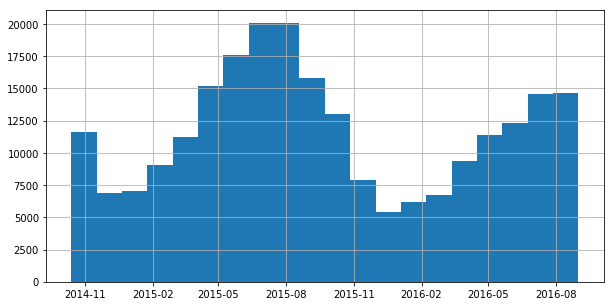

In [87]:
df_trips['starttime'].hist(figsize=figsize, bins=20)

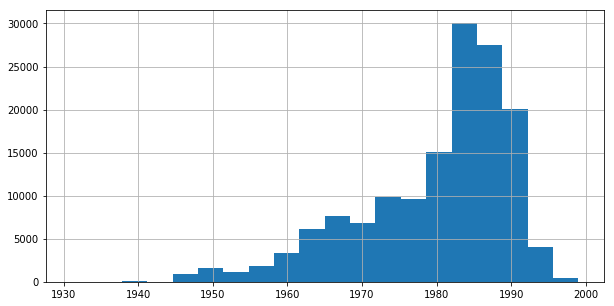

In [89]:
df_trips['birthyear'].hist(figsize=figsize, bins=20)

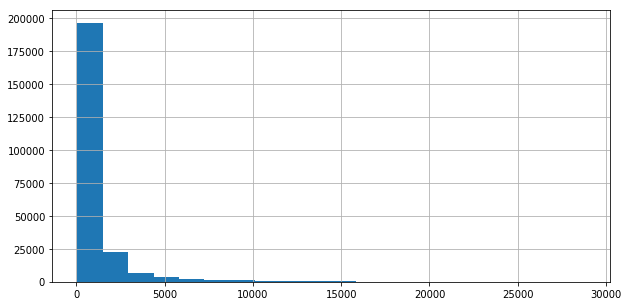

In [94]:
df_trips['tripduration'].hist(figsize=figsize, bins=20)

I'm extracting the date of each trip as a separate variable, i want to use that to calculate trips per day and join this dataset with the weather data.

In [170]:
import datetime

df_trips['date'] = df_trips['starttime'].apply(lambda x: datetime.date(year=x.year, month=x.month, day=x.day).isoformat())

Now i'm going to calculate the number of trips per day, using groupby function of a dataframe.

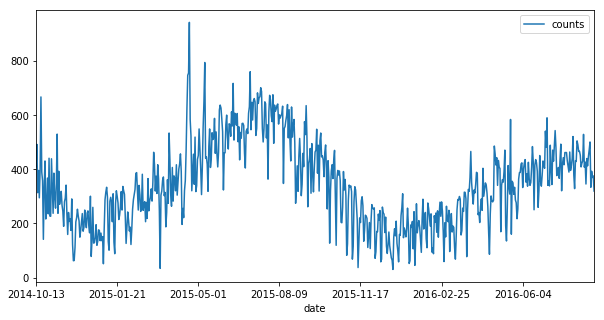

In [255]:
trips_per_day = df_trips[['date']].groupby(['date']).size().reset_index(name='counts')
trips_per_day = trips_per_day.set_index('date')
trips_per_day.sort_values(by='counts', ascending=False)
#trips_per_day.hist()
trips_per_day[['counts']].plot(figsize=figsize)

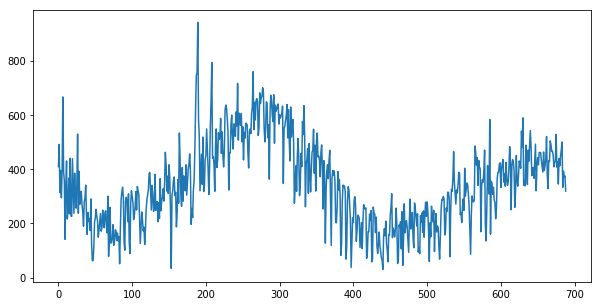

In [120]:
plt.figure(figsize=figsize)
plt.plot(trips_per_day.values)


/usr/local/lib/python3.6/site-packages/matplotlib/axes/_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=4.0, right=4.0
  'left=%s, right=%s') % (left, right))
/usr/local/lib/python3.6/site-packages/matplotlib/axes/_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  'left=%s, right=%s') % (left, right))


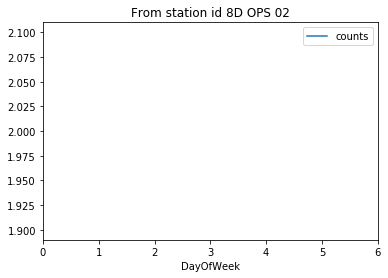

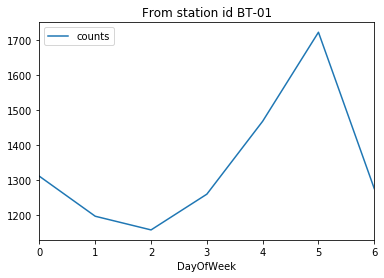

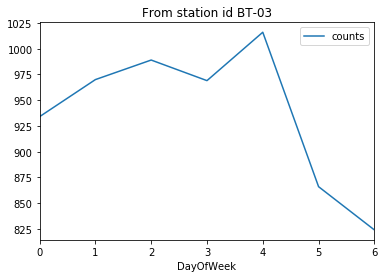

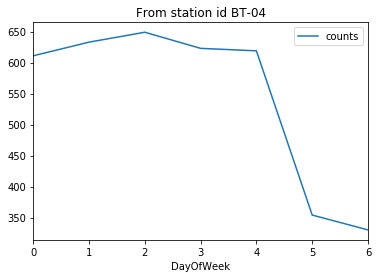

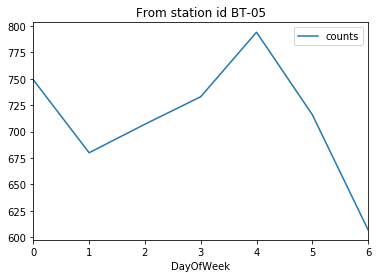

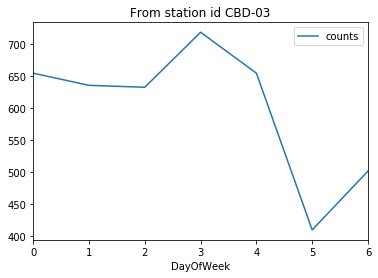

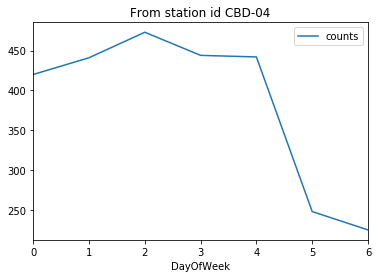

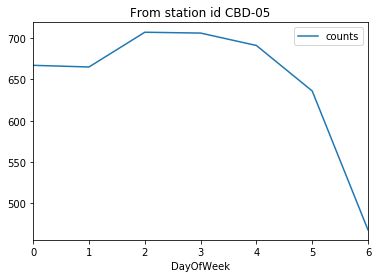

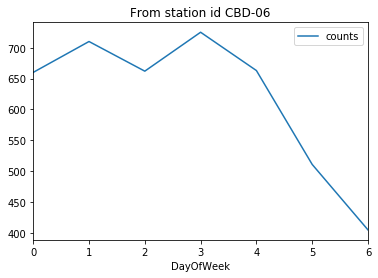

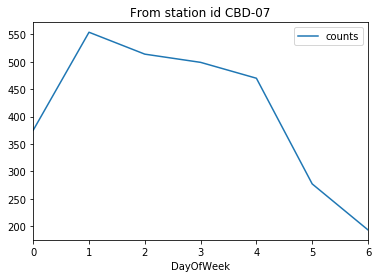

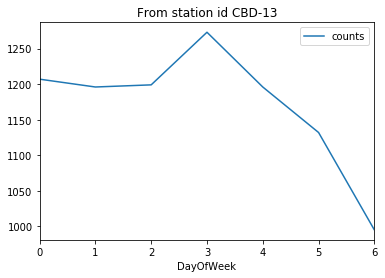

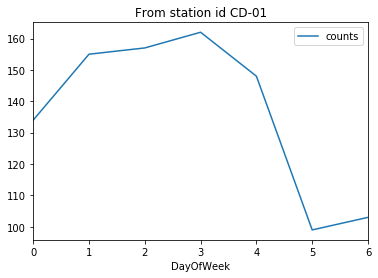

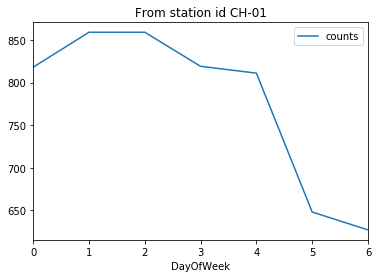

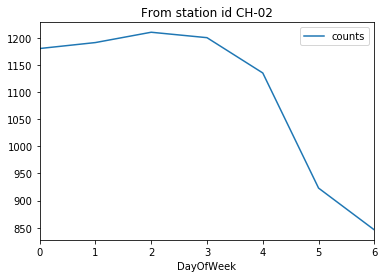

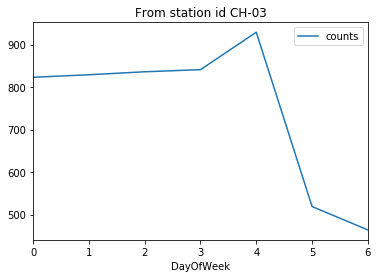

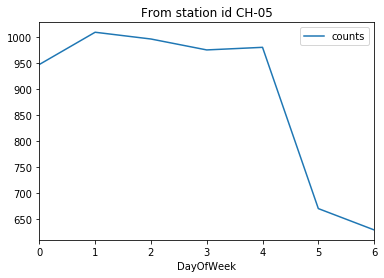

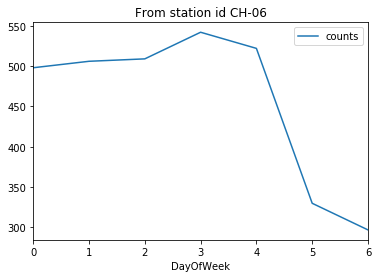

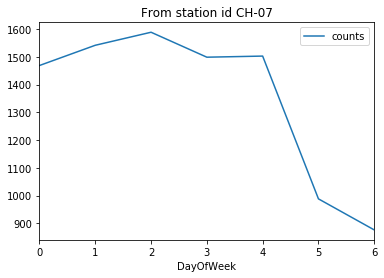

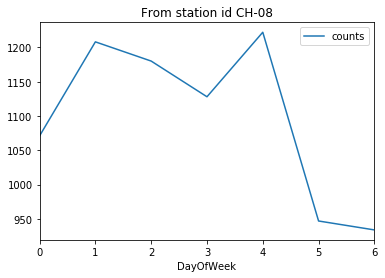

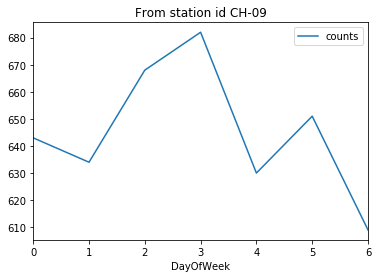

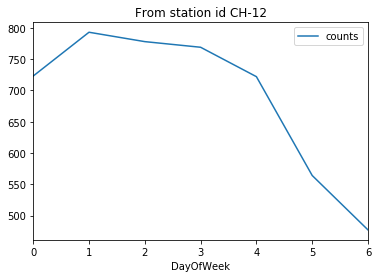

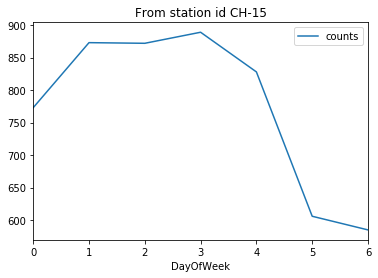

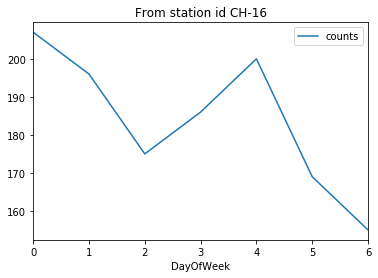

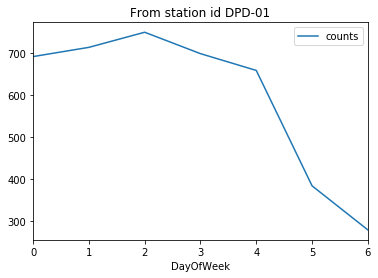

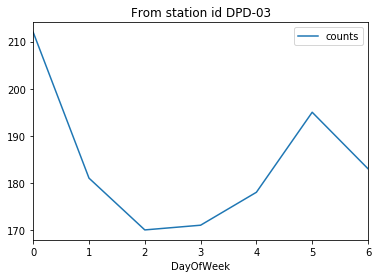

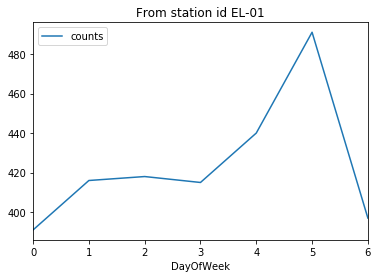

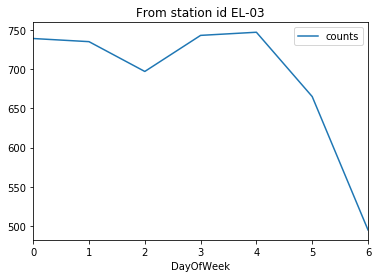

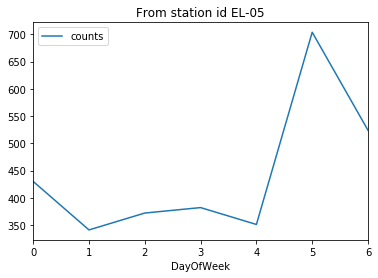

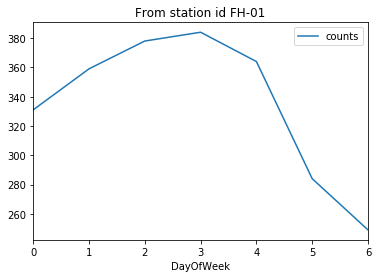

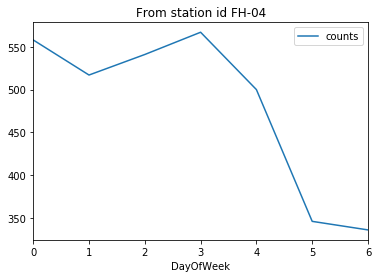

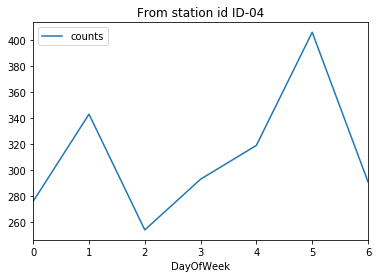

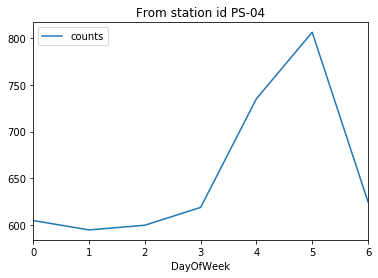

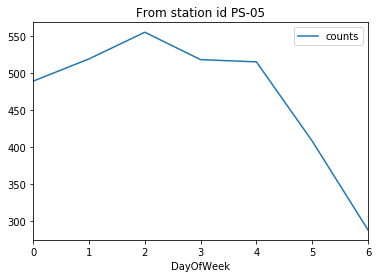

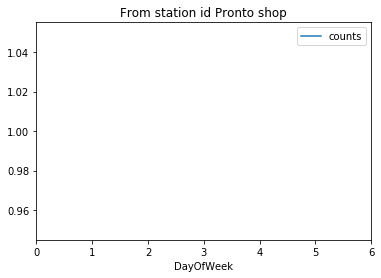

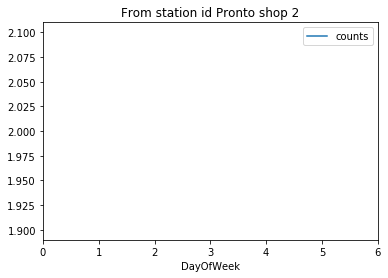

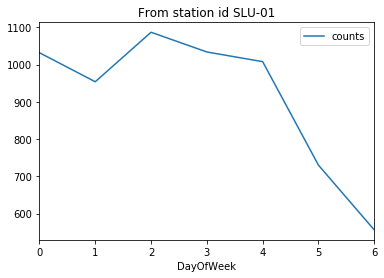

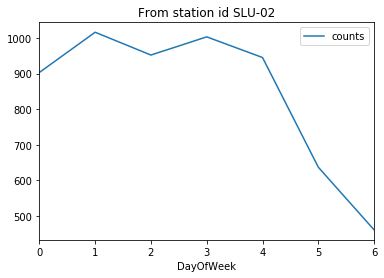

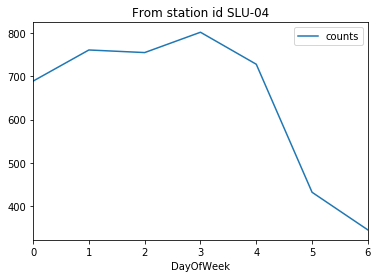

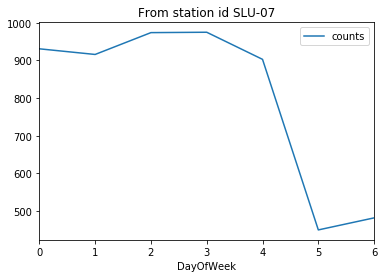

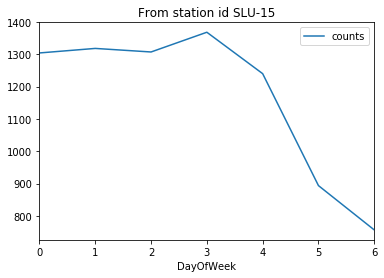

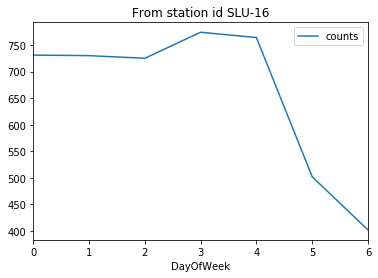

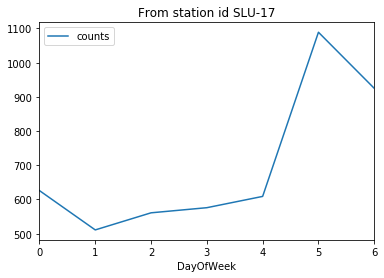

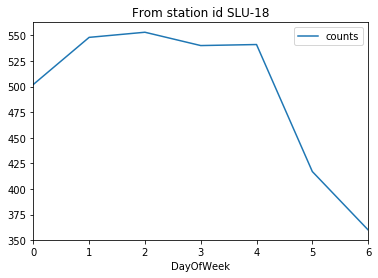

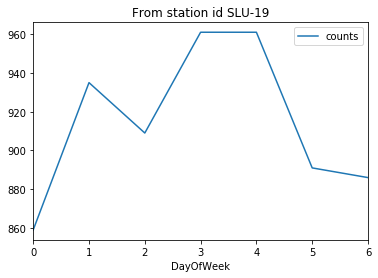

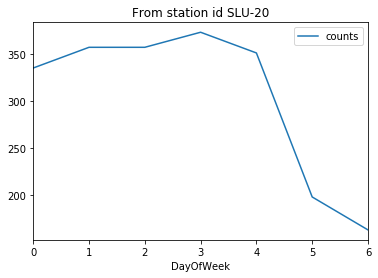

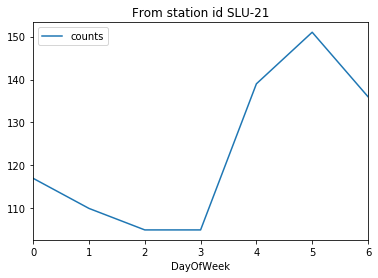

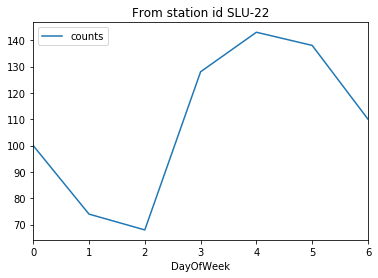

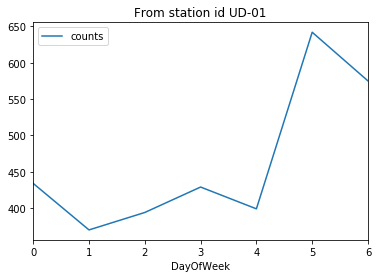

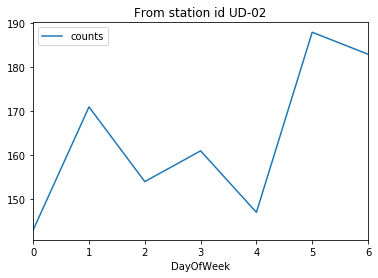

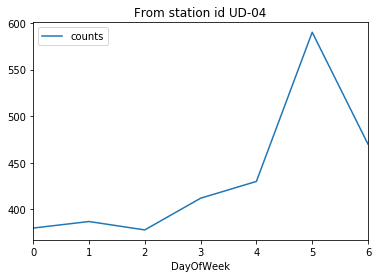

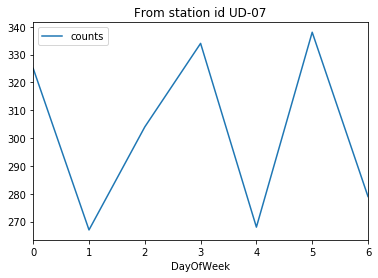

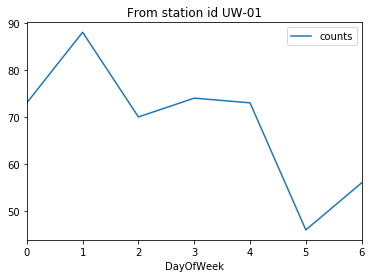

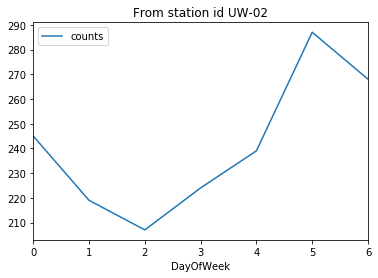

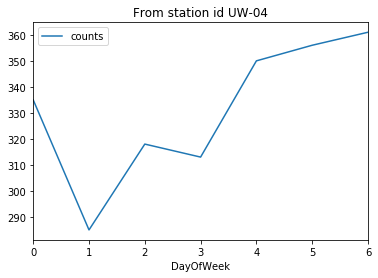

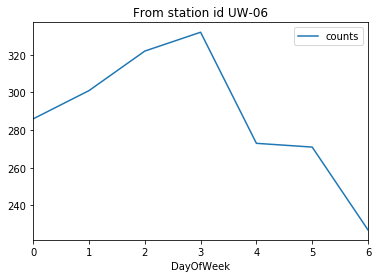

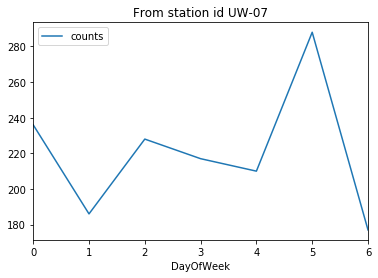

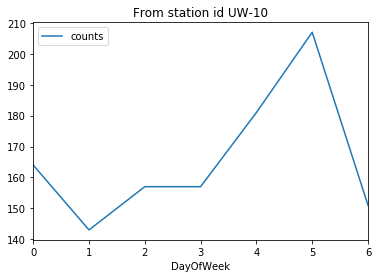

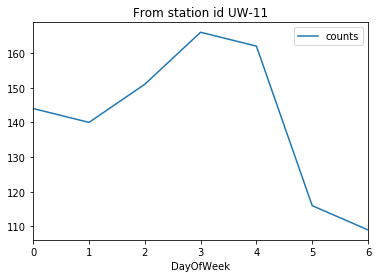

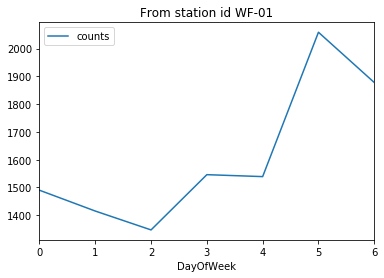

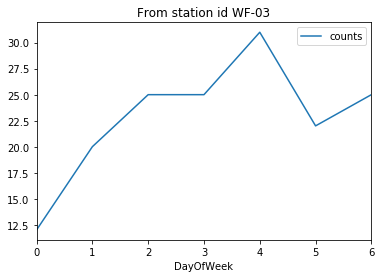

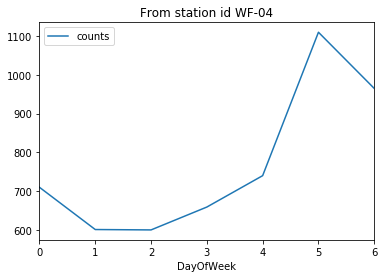

In [241]:
# popular weekdays of stations (any differences?)
df_trips2 = df_trips.copy()
df_trips2['DayOfWeek'] = df_trips2['starttime'].map(lambda x: x.dayofweek)
#df_trips2['starttime'].map(lambda x: x.weekday)
df_trips2.head()
stations_week_days = df_trips2.groupby(by=['from_station_id', 'DayOfWeek']).count()
stations_week_days = stations_week_days[['starttime']]
stations_week_days = stations_week_days.rename(columns={'starttime': 'counts'})
stations_week_days = stations_week_days.reset_index(level='DayOfWeek')

#stations_week_days.head()

for title, group in stations_week_days.groupby('from_station_id'):
    group.plot(
        x='DayOfWeek',
        y='counts',
        title=f'From station id {title}',
        xlim=(0,6)
    )


In [248]:
# popular stations - from (why?)

df_pop_stations = df_trips.copy()
popular = df_pop_stations.groupby('from_station_id').count()[['starttime']].rename(columns={'starttime': 'counts'})
popular.sort_values(by='counts', ascending=False)

,counts
from_station_id,
WF-01,11274
CH-07,9466
BT-01,9392
CBD-13,8198
SLU-15,8188
CH-08,7690
CH-02,7685
BT-03,6568
SLU-19,6402


In [249]:
# popular stations - to (why?)

df_pop_stations = df_trips.copy()
popular = df_pop_stations.groupby('to_station_id').count()[['starttime']].rename(columns={'starttime': 'counts'})
popular.sort_values(by='counts', ascending=False)

,counts
to_station_id,
WF-01,11768
CBD-13,11408
BT-01,9202
SLU-15,9009
SLU-07,8469
PS-04,7898
WF-04,7621
SLU-04,7504
SLU-16,7318


In [ ]:
# Trends in station usage?



Next step is joining the weather data with the trips_per_day data.

In [124]:
df_combined = df_weather.join(trips_per_day)

df_combined.head()

,Max_Temperature_F,Mean_Temperature_F,Min_TemperatureF,Max_Dew_Point_F,MeanDew_Point_F,Min_Dewpoint_F,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Sea_Level_Pressure_In,...,Min_Sea_Level_Pressure_In,Max_Visibility_Miles,Mean_Visibility_Miles,Min_Visibility_Miles,Max_Wind_Speed_MPH,Mean_Wind_Speed_MPH,Max_Gust_Speed_MPH,Precipitation_In,Events,counts
Date,,,,,,,,,,,,,,,,,,,,,
2014-10-13,71,62.0,54,55,51,46,87,68,46,30.03,...,29.65,10,10,4,13,4,21,0.00,Rain,409
2014-10-14,63,59.0,55,52,51,50,88,78,63,29.84,...,29.54,10,9,3,10,5,17,0.11,Rain,491
2014-10-15,62,58.0,54,53,50,46,87,77,67,29.98,...,29.51,10,9,3,18,7,25,0.45,Rain,313
2014-10-16,71,61.0,52,49,46,42,83,61,36,30.03,...,29.81,10,10,10,9,4,-,0.00,Rain,395
2014-10-17,64,60.0,57,55,51,41,87,72,46,29.83,...,29.73,10,10,6,8,3,-,0.14,Rain,294


In [250]:
df_combined.to_csv('weather_and_count.csv')

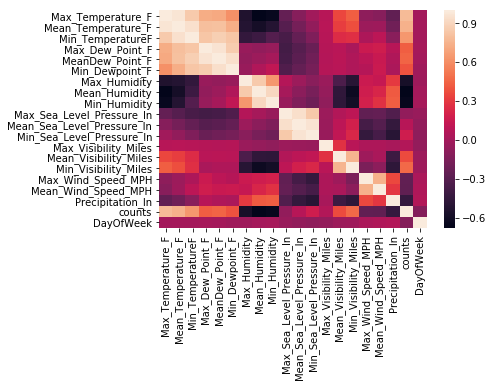

In [256]:
import seaborn as sns

corr_combined = df_combined.corr()
corr_combined
# plot the heatmap
sns.heatmap(corr_combined, 
        xticklabels=corr_combined.columns,
        yticklabels=corr_combined.columns)

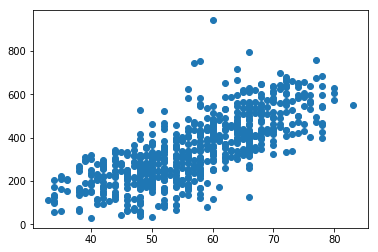

In [134]:
plt.scatter(df_combined['Mean_Temperature_F'], df_combined['counts'])

## Plotting data

Now that we have prepared one DataFrame with all the relevant data (weather, trips-per-day) we can make some plots and investigate possible relations.

Having a manual look at relations helps understand if there are patterns to the data (correlation, negative/positive, etc ...). Which tells us if a machine learning algorithm will be able to learn from the data.

First we'll look at temparature vs trips:

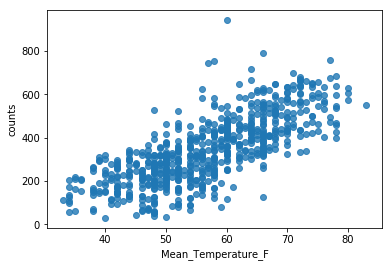

In [135]:
import seaborn as sns

sns.regplot(x="Mean_Temperature_F", y="counts", data=df_combined, fit_reg=False)

So there appears to be a positive relation between temparature and number of trips. That's promising!

Second i'm going to look at humidity.

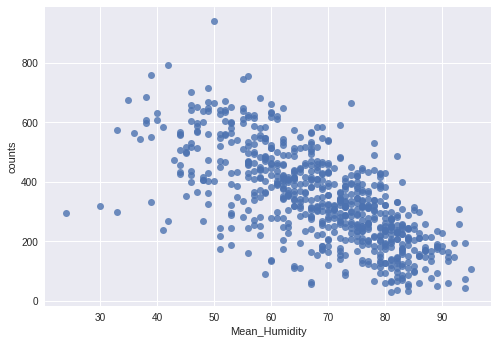

In [8]:
sns.regplot(x="Mean_Humidity", y="counts", data=df_combined, fit_reg=False)

Humidity has a negative relation. It looks pretty clear, so also a good predictor!

Next i also think there is a relation with the day of the week, perhaps weekdays are busier than weekend or vice-versa. Let's add the feature and check?

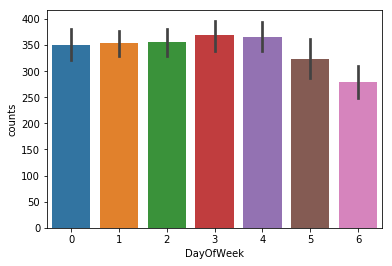

In [139]:
df_combined['DayOfWeek'] = df_combined.index.map(lambda x: x.weekday)

sns.barplot(x="DayOfWeek", y="counts", data=df_combined)

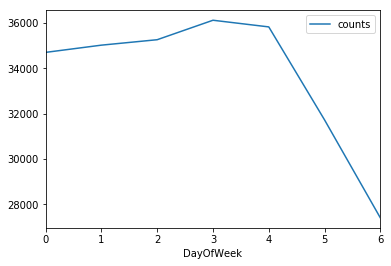

In [157]:
import numpy as np
df_combined.groupby(by='DayOfWeek').agg({'counts': np.sum}).plot()

In [ ]:
#week_days_counts = df_combined.groupby(by='DayOfWeek').size().reset_index(name='count').set_index('usertype')
#plt.pie(week_days_counts, labels=week_days_counts.index.values)

## Machine learning model

So we've have a look at the data and seen that there are some interesting patterns.  We're now ready to try some machine learning!

In [158]:
X = df_combined[["Mean_Temperature_F", "Mean_Humidity", "DayOfWeek"]]
y = df_combined['counts']

Unfortunately there is some "N/A" or empty values in the dataset. We'll need to fill them in, in this case i'm just going to put the mean of each column in there.

In [159]:
X = X.fillna(X.mean())

Now we're ready for training a model!

In [160]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(min_samples_split=10, min_samples_leaf=5)

Let's train and evaluate the model - see how it does!

In [161]:
from sklearn.model_selection import cross_val_score, ShuffleSplit

results = cross_val_score(model, X, y, cv=ShuffleSplit(n_splits=5))
print("Score: %.2f (%.2f)" % (results.mean(), results.std()))

Score: 0.72 (0.04)


Another model is a decision tree, it's a simpler model than a random forest because it's only one tree, where a random forest preedicts by taking the average of many trees.

Let's see how this model performs?

In [162]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(min_samples_split=20, min_samples_leaf=10)

results = cross_val_score(model, X, y, cv=ShuffleSplit(n_splits=5))
print("Score: %.2f (%.2f)" % (results.mean(), results.std()))

Score: 0.67 (0.06)


Finally, i'll train and evaluate a linear regression model. Such a model only works for linear relations, and we saw there was a non-linear relation with the day of the week. So i expect this to work less well.

Let's see how it does?

In [163]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

results = cross_val_score(model, X, y, cv=ShuffleSplit(n_splits=5))
print("Score: %.2f (%.2f)" % (results.mean(), results.std()))

Score: 0.67 (0.07)


/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
